# 0.0. IMPORTS

In [53]:
#id - Unique ID for each home sold
#date - Date of the home sale
#price - Price of each home sold
#bedrooms - Number of bedrooms
#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
#sqft_living - Square footage of the apartments interior living space
#sqft_lot - Square footage of the land space
#floors - Number of floors
#waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
#view - An index from 0 to 4 of how good the view of the property was
#condition - An index from 1 to 5 on the condition of the apartment, greater good
#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average 
#level of construction and design, and 11-13 have a high quality level of construction and design. reater good
#sqft_above - The square footage of the interior housing space that is above ground level
#sqft_basement - The square footage of the interior housing space that is below ground level
#yr_built - The year the house was initially built
#yr_renovated - The year of the house’s last renovation
#zipcode - What zipcode area the house is in
#lat - Lattitude
#long - Longitude
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [105]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import plotly.express as px

from matplotlib      import pyplot as plt
from IPython.display import Image

import inflection
import warnings

## 0.1. Helper Functions

In [55]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
    
warnings.filterwarnings( 'ignore' )
pd.options.display.float_format = '{:.2f}'.format

In [56]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [57]:
df_raw = pd.read_csv( 'data/kc_house_data.csv', low_memory=False )

In [58]:
df_raw.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16305,5104510010,20140701T000000,321000.00,4,2.50,1830,9601,2.00,0,0,3,7,1830,0,2003,0,98038,47.35,-122.02,1830,5892
5320,1443500305,20141013T000000,194990.00,6,2.50,1560,7144,1.00,0,0,3,6,1060,500,1913,0,98118,47.53,-122.27,1300,6232
1753,6821101837,20150203T000000,368000.00,2,2.00,930,1662,1.00,0,0,3,7,670,260,2002,0,98199,47.65,-122.40,1780,2343
11254,2126049290,20150220T000000,522500.00,4,3.00,2370,8154,1.00,0,0,3,7,1380,990,1977,0,98125,47.73,-122.31,2100,8148
13645,1329500120,20150109T000000,300000.00,4,2.50,2600,8572,2.00,0,0,3,8,2600,0,2003,0,98001,47.32,-122.27,2170,5288


# 1.0. DATA DESCRIPTION

In [59]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [60]:
print(f"Number Of Rows: {df1.shape[0]}" )
print(f"Number Of Cols: {df1.shape[1]}" )

Number Of Rows: 21613
Number Of Cols: 21


## 1.2. Data Types

In [61]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3. Check NA

In [62]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4. Change Types

In [63]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.5. Change Types

In [64]:
df1['price'] = df1['price'].astype( int ) 

## 1.6. Descreptive Statistical

In [65]:
num_attributes = df1.drop( ['date','waterfront'], axis=1 )

In [66]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] )

In [67]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
7,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
8,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53
9,grade,1.00,13.00,12.00,7.66,7.00,1.18,0.77,1.19


In [70]:
df1['date'].max()

Timestamp('2015-05-27 00:00:00')

In [71]:
df1['date'].min()

Timestamp('2014-05-02 00:00:00')

# 2.0.  FEATURE ENGINEERING

In [ ]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

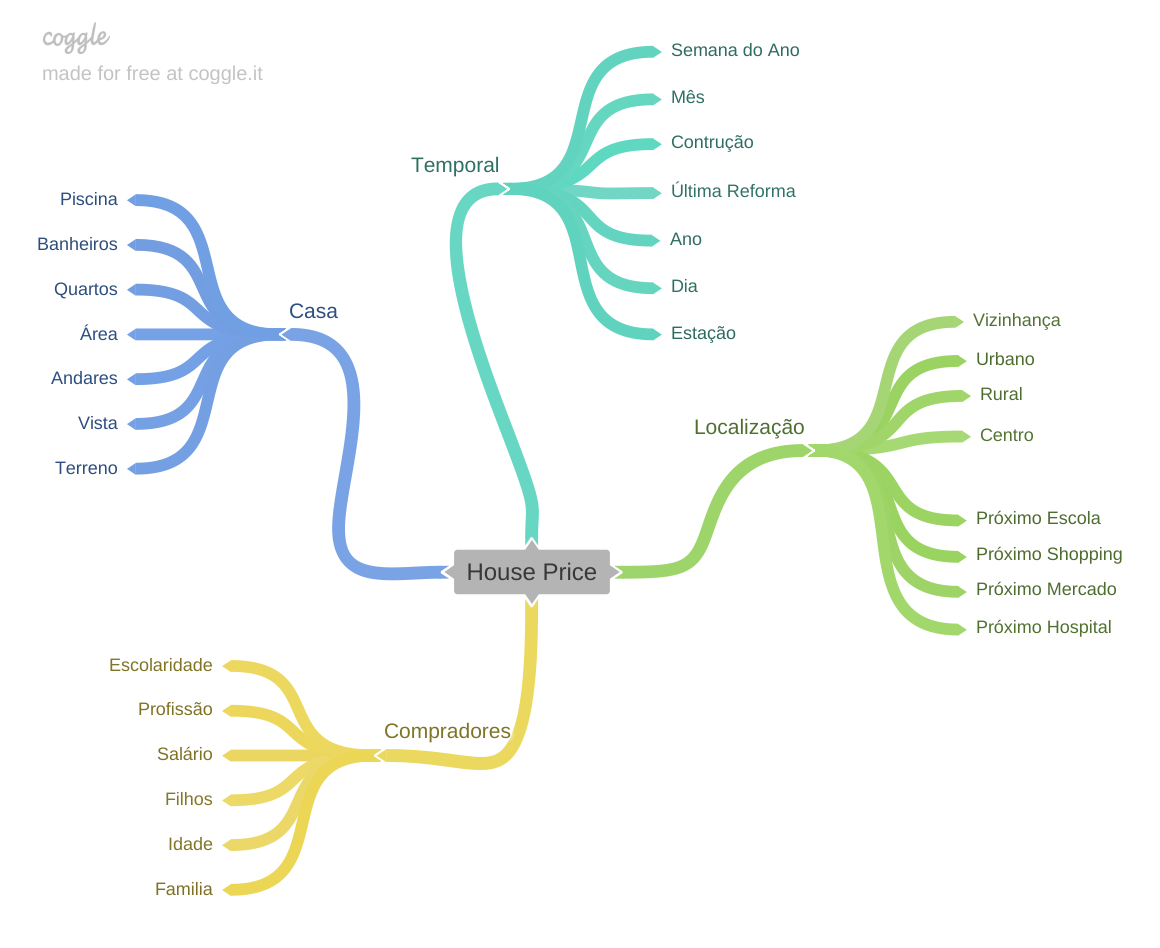

In [79]:
Image( 'image/House_Price.png' )

## 2.2. Criacao de Hipoteses

### 2.2.1. Hipoteses casa

### 2.2.2. Hipoteses Compradores

### 2.2.3. Hipoteses Localizacao

### 2.2.4. Hipoteses Tempo

In [109]:
houses = df2[['id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox( houses,
                         lat = 'lat',
                         lon = 'long',
                         size = 'price',
                         color_continuous_scale = px.colors.cyclical.IceFire,
                         size_max=15,
                         zoom=10 )

fig.update_layout( mapbox_style = 'open-street-map' )
fig.update_layout( height=900, margin={ 'r': 0, 't': 0, 'l': 0, 't': 0 } )
fig.show()